# Real/Fake News Classifier

## Introduction

The following project aims to analyze the nature of a particular news item, and classify it as either real/fake.

The following classification is done as part of a larger idea of Natural Language Programming(NLP) which aims to work upon, analyze and draw meaningful results from actual human languages. As machines essentially work with binary data, it an important part is the conversion of the text into machine processable form.

In [14]:
import pandas as pd

path_true = 'Datasets/True.csv'
path_fake = 'Datasets/Fake.csv'

true_df = pd.read_csv(path_true)
fake_df = pd.read_csv(path_fake)

In [15]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [16]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


# PreProcessing the Data

### Missing Entries

As the data has no missing entries, this aspect is dealt with.
Had their been such entries, they would either have been replaced by analyzing the nature of the data or the column dropped altogether, had it not had an impact on the final result.

In [17]:
print('True:\n{}'.format(true_df.isna().sum()))
print('-' * 12)
print('Fake:\n{}'.format(fake_df.isna().sum()))

True:
title      0
text       0
subject    0
date       0
dtype: int64
------------
Fake:
title      0
text       0
subject    0
date       0
dtype: int64


In [18]:
true_df['text_length'] = true_df.text.apply(lambda x : len(x))
fake_df['text_length'] = fake_df.text.apply(lambda x : len(x))

true_df['nature'] = True
fake_df['nature'] = False

In [19]:
print(true_df.subject.value_counts())
print('-' * 27)
print(fake_df.subject.value_counts())

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64
---------------------------
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64


## Data Visualization

Understanding the key drivers that impact the final result of the data to identify and isloate the key parametres.

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

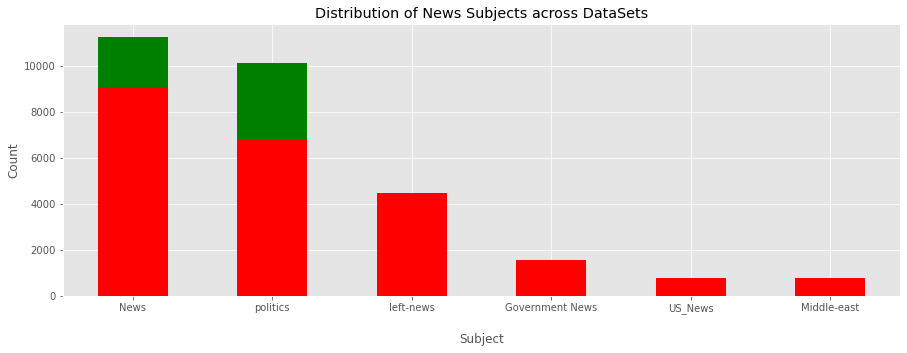

In [21]:
plt.figure(figsize = (15, 5))
plt.style.use('ggplot')

true_df.subject.value_counts().plot(kind = 'bar',
                                   color = 'green',
                                   rot = 0)
fake_df.subject.value_counts().plot(kind = 'bar',
                                   color = 'red',
                                   rot = 0)

plt.title('Distribution of News Subjects across DataSets')
plt.xlabel('\nSubject')
plt.ylabel('Count')
plt.show()

In [22]:
true_df.head()

,title,text,subject,date,text_length,nature
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",4659,True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",4077,True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",2789,True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",2461,True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",5204,True


In [23]:
def wordcloud_generator(data):
    words = ''.join([word for word in data.title])
    
    wordcloud = WordCloud(width = 1000, height = 800,
                         max_font_size = 110,
                         collocations = False).generate(words)
    
    plt.figure(figsize = (20, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

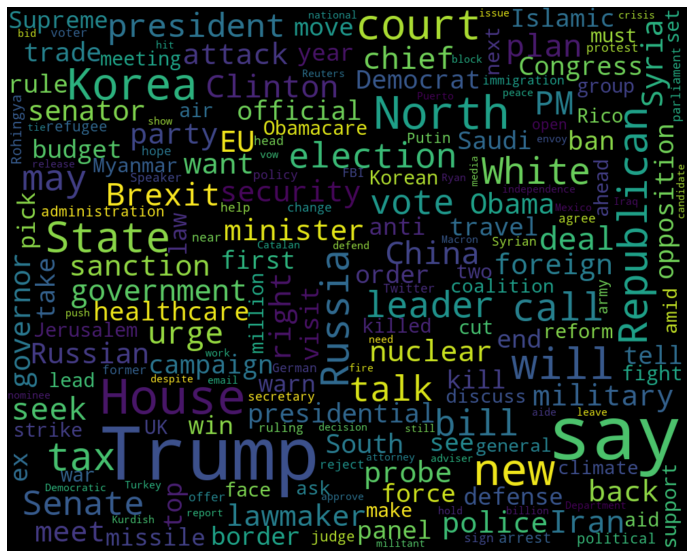

In [24]:
wordcloud_generator(true_df)

In [25]:
fake_df.head()

,title,text,subject,date,text_length,nature
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",2893,False
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1898,False
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",3597,False
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",2774,False
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",2346,False


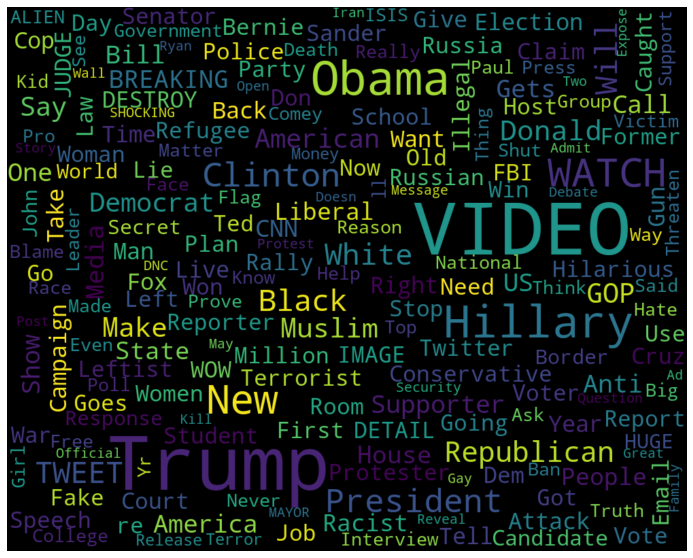

In [26]:
wordcloud_generator(fake_df)

In [27]:
news_df = pd.concat([true_df, fake_df])
print(news_df.shape)

(44898, 6)


## Shuffling Entries in DataSet

As the data had previsouly been sorted in descending order of date published, the training data could get contaminated should there be a higher frequency of fake news published around a particular time/date.

However there is no apparent co-relation as is displayed through following visualizations.

In [28]:
news_df = news_df.sample(frac = 1)

In [29]:
news_df.head()

,title,text,subject,date,text_length,nature
15388,BREAKING VIDEO: HILLARY CLINTON PLAYS DODGEBAL...,She s really good at this! This should disqual...,politics,"Jul 30, 2015",109,False
7483,EU's Mogherini says EU-U.S. ties deeper than a...,BRUSSELS (Reuters) - EU foreign policy chief F...,politicsNews,"November 9, 2016",608,True
17383,Thai hotels booked up ahead of funeral of reve...,BANGKOK (Reuters) - Hotels in Bangkok s bustli...,worldnews,"October 16, 2017",1645,True
19067,ILLEGAL ALIEN PROTESTERS Yell at Police for No...,,left-news,"Feb 28, 2017",1,False
4569,"A Dallas Cop Just Filed Suit Against Obama, H...","A Dallas police officer, seeing red after seve...",News,"September 18, 2016",4070,False


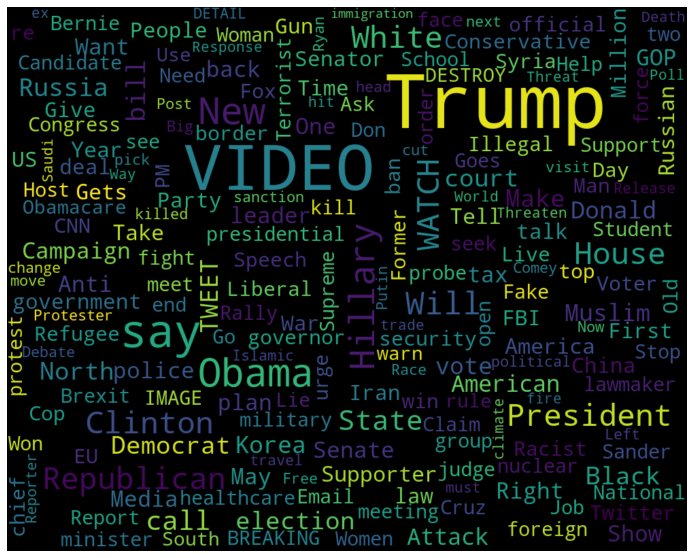

In [30]:
wordcloud_generator(news_df)

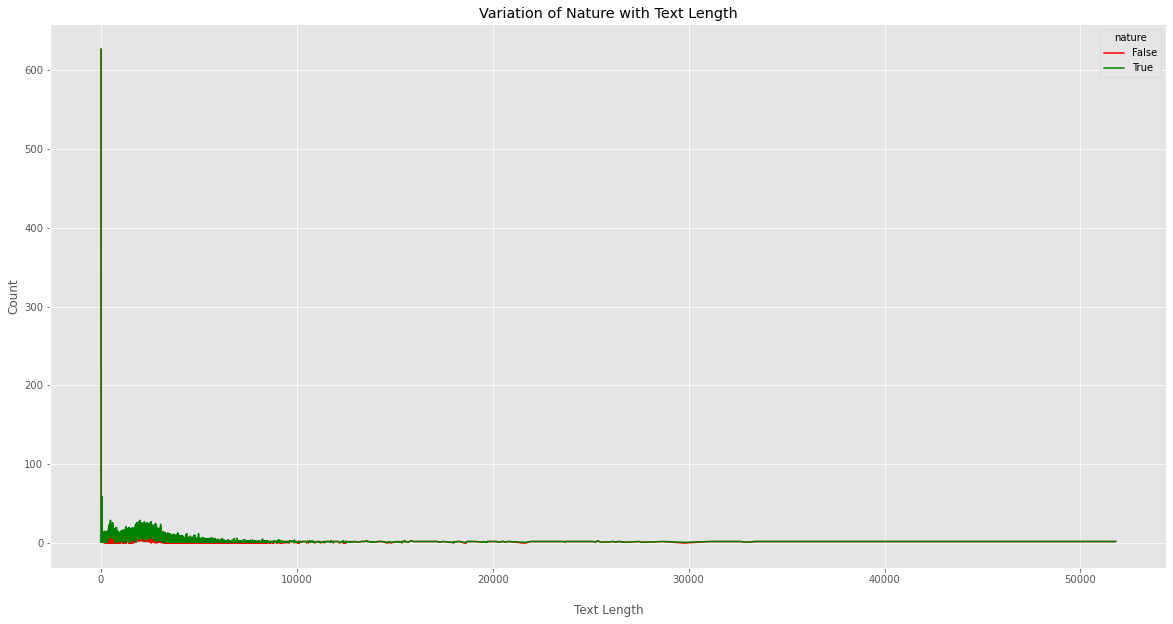

In [31]:
news_df.groupby(['text_length', 'nature']).size().unstack().plot(figsize = (20, 10),
                                                                 stacked = True,
                                                                 color = ['red', 'green'],
                                                                 rot = 0)

plt.title('Variation of Nature with Text Length')
plt.xlabel('\nText Length')
plt.ylabel('Count')

plt.show()

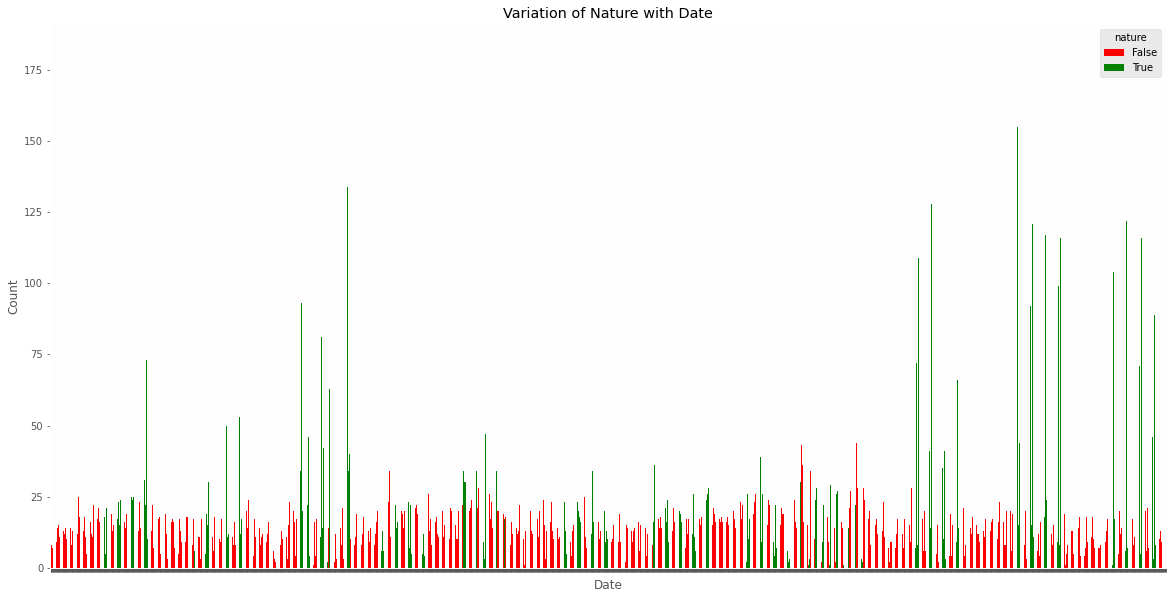

In [32]:
import warnings
warnings.filterwarnings('ignore')

news_df.groupby(['date', 'nature']).size().unstack().plot(figsize = (20, 10),
                                                          kind = 'bar',
                                                          stacked = True,
                                                          color = ['red', 'green'],
                                                          rot = 0)

plt.axes().xaxis.set_major_formatter(plt.NullFormatter())

plt.title('Variation of Nature with Date')
plt.xlabel('Date')
plt.ylabel('Count')

plt.show()

As is apparent from the data visualization, not all parametres have an impact on the final outcome, be it any macro or micr trends.

In [33]:
correlation = news_df.corr()
correlation.style.background_gradient(cmap = 'coolwarm', axis = None).set_precision(3)

,text_length,nature
text_length,1.000,-0.038
nature,-0.038,1.000


As a heatmap captures the co-relation between parametres convertible to numeric form, the other parametres are not visualized in the heatmap.

Converting boolean values to numeric form results in either 1 or 0, depending on either True or False.

## Grouping Useful Data Subsets for PreProcessing

In [34]:
news_df['Article'] = news_df.subject + ' ' + news_df.title + ' ' + news_df.text
news_df.Article

15388    politics BREAKING VIDEO: HILLARY CLINTON PLAYS...
7483     politicsNews EU's Mogherini says EU-U.S. ties ...
17383    worldnews Thai hotels booked up ahead of funer...
19067    left-news ILLEGAL ALIEN PROTESTERS Yell at Pol...
4569     News  A Dallas Cop Just Filed Suit Against Oba...
                               ...                        
17898    worldnews No angst over Turkey's air defense d...
12828    worldnews Hezbollah urges Palestinian uprising...
8862     politicsNews U.S. attorney general to testify ...
11092    politics IS FOX ABOUT TO BECOME CNN? Leftist W...
17625    worldnews Brexit talks deadlock on cash, Barni...
Name: Article, Length: 44898, dtype: object

## Data Cleaning and Optimization

This is done through the following three processes:
1. Removing punctuations:
Removing punctuations such as special symbols that do not have a very significant impact on training processes.
2. Removing Stopwords:
Removing words that do not add any sort of meaning to the text.
3. Leammatizing the entire string:
Converting words to their base form to avoid any sort of confusion that might arise due to different forms or usage of the same words.

In [35]:
import string

def cleaner(text):
    return ''.join([character for character in text if character not in string.punctuation])

In [36]:
import nltk
from nltk.corpus import stopwords, wordnet
from collections import Counter
from nltk.stem import WordNetLemmatizer

global stopwords_dict
global lemmatizer

stopwords_dict = (stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [37]:
def optimizer(text):
    return ' '.join([words for words in text.split() if words not in stopwords_dict])

In [38]:
#Lemmatization process adapted from https://medium.com/@gaurav5430/using-nltk-for-lemmatizing-sentences-c1bfff963258

lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [39]:
news_df.Article = news_df.Article.apply(cleaner)
news_df.Article = news_df.Article.apply(optimizer)
news_df.Article = news_df.Article.apply(lemmatize_sentence)

In [40]:
news_df.Article

15388    politics BREAKING VIDEO HILLARY CLINTON PLAYS ...
7483     politicsNews EUs Mogherini say EUUS tie deeper...
17383    worldnews Thai hotel book ahead funeral revere...
19067    leftnews ILLEGAL ALIEN PROTESTERS Yell Police ...
4569     News A Dallas Cop Just Filed Suit Against Obam...
                               ...                        
17898    worldnews No angst Turkeys air defense deal Ru...
12828    worldnews Hezbollah urge Palestinian uprise Tr...
8862     politicsNews US attorney general testify House...
11092    politics IS FOX ABOUT TO BECOME CNN Leftist Wi...
17625    worldnews Brexit talk deadlock cash Barnier ey...
Name: Article, Length: 44898, dtype: object

## Vectorization of the String

The String is converted into Vectror form to make it processable. This is done in the following 2 steps:

1. Bag of Words Encoding:
This process converts the entire string into a Dictionary, with the different words as Keys, and their frquesncy in the string as their Values.
2. Tf-Idf Encoding:
It stands for 'Term Frequency — Inverse Document Frequency', and is a process of assigning each a word a specific numeric value in a weighted manner, essentially its importance in the entire or text as a whole.

The resultant string is converted into its subsequent vector representation.

In [41]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

vectorizer = CountVectorizer().fit(news_df.Article)
Text_bow = vectorizer.transform(news_df.Article)

transformer = TfidfTransformer().fit(Text_bow)
Text_tfidf = transformer.transform(Text_bow)

In [42]:
print(Text_tfidf.shape)
print(news_df.shape)

(44898, 221519)
(44898, 7)


## Splitting Data into Training and Testing Parts

The data that was initially shiffled is divided into training and testing bits. 20% of the data is used for training purposes, while the rest is used for validating the accuracy of the model's predictions.

In [43]:
from sklearn.model_selection import train_test_split

X = Text_tfidf
y = news_df.nature

train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                   train_size = 0.2,
                                                   random_state = 1)

In [44]:
from sklearn.metrics import mean_absolute_error, classification_report

In [45]:
#Confusion Matrix adopted from https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels

import seaborn as sns 
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(test_y, predictions, model_name):
    cm = confusion_matrix(test_y, predictions)

    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    plt.title('Confusion matrix of the classifier')

    # labels, title and ticks
    ax.set_xlabel('\nPredicted Labels')
    ax.set_ylabel('True Labels')
    
    title = 'Confusion Matrix for ' + model_name
    ax.set_title(title)
    ax.xaxis.set_ticklabels(['Real', 'Fake'])
    ax.yaxis.set_ticklabels(['Real', 'Fake'])
    plt.show()

## Model Selection

Since the only paramtres are strings that have been grouped together, a Naive Bayes Model is used as the inital model.

In [46]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(train_X, train_y)
predictions = model.predict(test_X)

In [47]:
print(mean_absolute_error(pd.DataFrame(predictions), pd.DataFrame(test_y)))
print('-' * 76)
print('Classification Report:', classification_report(test_y, predictions))

0.05765750716890782
----------------------------------------------------------------------------
Classification Report:               precision    recall  f1-score   support

       False       0.93      0.96      0.95     18753
        True       0.95      0.92      0.94     17166

    accuracy                           0.94     35919
   macro avg       0.94      0.94      0.94     35919
weighted avg       0.94      0.94      0.94     35919



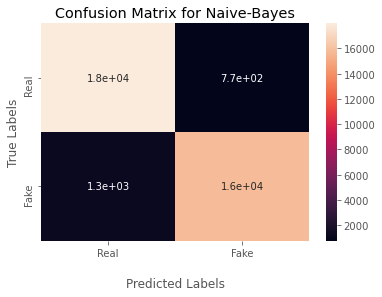

In [48]:
plot_confusion_matrix(test_y, predictions, 'Naive-Bayes')

Although a fairly significant amount of accuracy is acheived, certain linear models are used to try and optimize the results to a greater degree.

In [49]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier().fit(train_X, train_y)
predictions = model.predict(test_X)

In [50]:
print(mean_absolute_error(pd.DataFrame(predictions), pd.DataFrame(test_y)))
print('-' * 76)
print('Classification Report:', classification_report(test_y, predictions))

0.005233998719340739
----------------------------------------------------------------------------
Classification Report:               precision    recall  f1-score   support

       False       1.00      0.99      0.99     18753
        True       0.99      1.00      0.99     17166

    accuracy                           0.99     35919
   macro avg       0.99      0.99      0.99     35919
weighted avg       0.99      0.99      0.99     35919



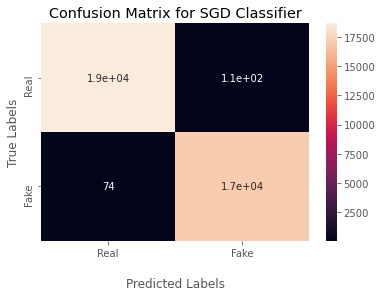

In [51]:
plot_confusion_matrix(test_y, predictions, 'SGD Classifier')

In [52]:
from sklearn.svm import LinearSVC

model = LinearSVC(random_state = 1, 
                  dual = False, 
                 max_iter = 1000).fit(train_X, train_y)
predictions = model.predict(test_X)

In [53]:
print(mean_absolute_error(pd.DataFrame(predictions), pd.DataFrame(test_y)))
print('-' * 76)
print('Classification Report:', classification_report(test_y, predictions))

0.005178317881900944
----------------------------------------------------------------------------
Classification Report:               precision    recall  f1-score   support

       False       1.00      0.99      1.00     18753
        True       0.99      1.00      0.99     17166

    accuracy                           0.99     35919
   macro avg       0.99      0.99      0.99     35919
weighted avg       0.99      0.99      0.99     35919



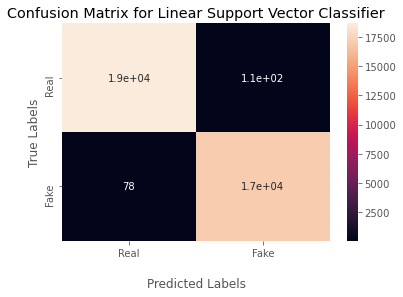

In [54]:
plot_confusion_matrix(test_y, predictions, 'Linear Support Vector Classifier')

# Conclusion

As is apparent from the results, an accuracy of over 99.4% is achieved. 

Although this is a fairly accurate end-result, the dataset could've bene further optimized for accuracy by a more meticulous lemmatizing process, and identifying trends in data that was otherwise looked over, primarily the date of posting. 
Furthermore, fine-tuning the various parametres of the regression model used could also have added to the accuracy of the final model.